<a href="https://colab.research.google.com/github/hsbidkar/DL-Project-1/blob/master/Assignment_Melanoma_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

## Building a simple CNN model

#### **Task 1: Reading the data**

Importing all the important libraries

In [ ]:
# Importing the required libraries
import pathlib
import os
import PIL

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

You are expected to load the data in the Colab environment by mounting the Google Drive. This will allow you to access the files from Google drive through Colab. 

Steps:
1. Upload the dataset in your Google Drive in a separate folder. Avoid spaces in the name of the folder or the zip file.
2. Mount the Google Drive using the code given below.
3. Unzip the file to access images.
4. Check the path for the datasets - train and test.


Note: The code is commented for you to learn and then make edits to execute the command.

In [ ]:
## If you are using the data by mounting the google drive, use the following:
from google.colab import drive
drive.mount('/content/gdrive')

## Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [ ]:
# Unzipping the files
# To do: Update the folder name and file name
!unzip /content/gdrive/MyDrive/CNN_assignment.zip -d /content/gdrive/MyDrive/

Archive:  /content/gdrive/MyDrive/CNN_assignment.zip
  inflating: /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Te

Check the path mentioned in the output: `Skin cancer ISIC The International Skin Imaging Collaboration`

In [ ]:
# Rename the directory for understandable directory structure and codes

!mv /content/gdrive/MyDrive/Skin\ cancer\ ISIC\ The\ International\ Skin\ Imaging\ Collaboration /content/gdrive/MyDrive/ISIC 

In [ ]:
!ls /content/gdrive/MyDrive/

 CNN_assignment.zip
'Colab Notebooks'
'CQF Enrolment Form 2020.pdf'
 foo.txt
 ISIC
'Sample file'
'Sample file (1)'
'Sample upload.txt'
 Starter_Code_Assignment_Melanoma_Detection.ipynb
 UB2799-AGS-2017-04-01-2018-03-31.xlsx
 UB2799-AGS-2018-04-01-2019-03-31.xlsx
 UB2799-AGS-2019-04-01-2020-03-31.xlsx


Provide the path for train and test images using pathlib library.

In [ ]:
# Defining the path for train and test images
## To do: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/ISIC/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/ISIC/Test/")

Check whether the data has been extracted successfully.

In [ ]:
# Train and test images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Train images:\t", image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test images:\t", image_count_test)

Train images:	 2239
Test images:	 118


#### **Task 2: Loading the images using keras.preprocessing**

The images are still not loaded in the Colab environment. We have extracted them from the zip file. Now, you are expected to load them in the Colab notebook using the `preprocessing` attribute.

Let's load these images off disk using the helpful image_dataset_from_directory utility. You can refer to the following [link](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory) to know more about the function. You can even refer to the additional notebooks on the page to check how the variables are defined.



Defining the parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Divide the training set into 2 parts: 
*   80% for training 
*   20% for validation



In [ ]:
## Write your code for train dataset here.
## Note: Use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note: Make sure you resize your images to the size: img_height*img_width, while specifying the variable

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your code for validation dataset here.
## Note: Use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note: Make sure you resize your images to the size: img_height*img_width, while specifying the variable

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the 'class_names' attribute associated with the training and validation datasets. 
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#### **Task 3: Visualize the data**

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

Write the code to visualize one instance of all the nine classes present in the dataset

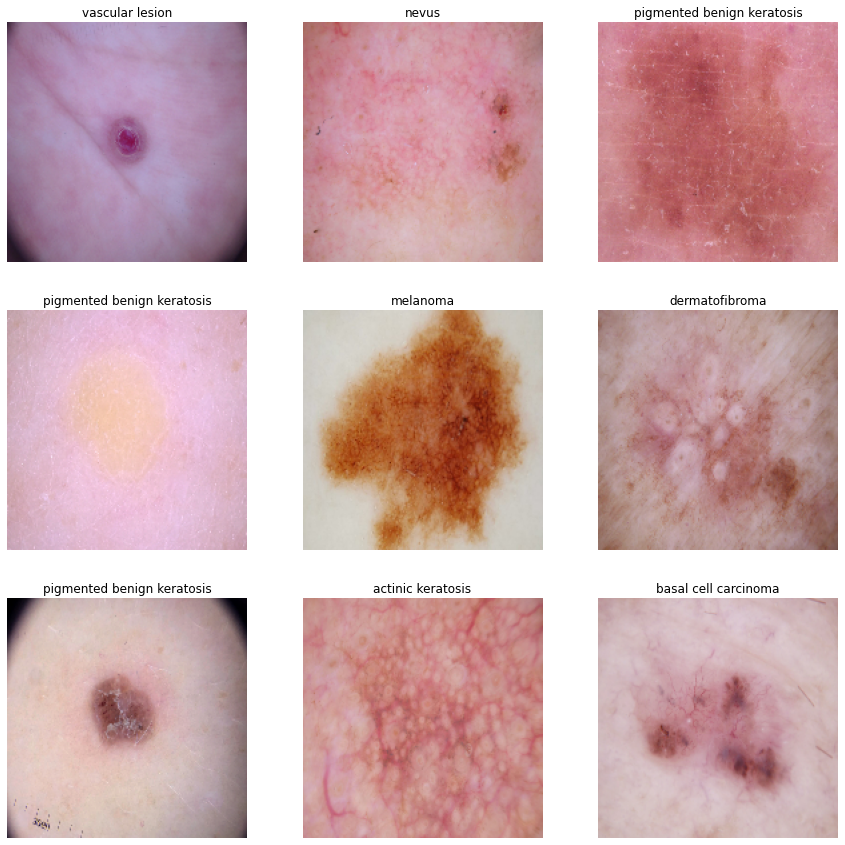

In [ ]:
import matplotlib.pyplot as plt

### Your code goes here; you can use either training or validation data to visualize the images.

plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  for i in range(len(class_names)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#### Configure the dataset for performance
Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Task 4: Create the model**
Create a CNN model, which can accurately detect 9 classes present in the dataset. 


*   Note: The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`. Use `layers.experimental.preprocessing.Rescaling` for this purpose.

In [ ]:
### Your code goes here

num_classes = len(class_names)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### **Question 1**: 
Explain the following elements associated with the problem:
1.   Selection of stride value (Reason for using a high/low value)
2.   Padding strategy used (Same/Valid)

#### **Answer**: 
The model above consists of three convolution blocks with a max pool layer in each of them. There's a fully connected layer with 128 units on top of it that is activated by a relu activation function. This model has not been tuned and is just a demo one.

We are not using stride here as we want to not skip any pixels.
We have used same padding since we want to analyse all pixels

#### **Task 5: Compile the model**
Choose an appropirate optimiser and loss function for model training.

In [ ]:
### Choose an appropirate optimiser and loss function
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

#### Train the model

In [ ]:
# The model needs to be trained for 20 epochs
epochs = 20

history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 573s 2s/step - loss: 2.0666 - accuracy: 0.2494 - val_loss: 1.8959 - val_accuracy: 0.2774
Epoch 2/20
56/56 [==============================] - 2s 43ms/step - loss: 1.8126 - accuracy: 0.3276 - val_loss: 1.6812 - val_accuracy: 0.4273
Epoch 3/20
56/56 [==============================] - 2s 41ms/step - loss: 1.7395 - accuracy: 0.3850 - val_loss: 1.6558 - val_accuracy: 0.4452
Epoch 4/20
56/56 [==============================] - 2s 41ms/step - loss: 1.5425 - accuracy: 0.4470 - val_loss: 1.5060 - val_accuracy: 0.4922
Epoch 5/20
56/56 [==============================] - 2s 41ms/step - loss: 1.4005 - accuracy: 0.5117 - val_loss: 1.4694 - val_accuracy: 0.4832
Epoch 6/20
56/56 [==============================] - 2s 41ms/step - loss: 1.2868 - accuracy: 0.5536 - val_loss: 1.4244 - val_accuracy: 0.5145
Epoch 7/20
56/56 [==============================] - 2s 41ms/step - loss: 1.2704 - accuracy: 0.5474 - val_loss: 1.3105 - val_accuracy: 0.5526
Epoch 8/20
56

#### Visualizing training results

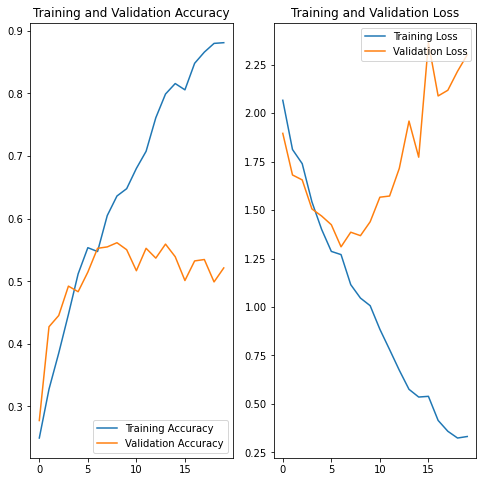

In [ ]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Question 2**:
Write your findings after the model fit, see if there is an evidence of model overfit or underfit

#### **Answer**:
We can see from above plot that training accuracy is approx.upto 90% while the validation accuracy is approx. upto 55% and training accuracy is increasing till 90% with number of epochs while validation stays between 48% to 55%

Also, reverse trend is seen in terms of loss i.e. training losses are decreasing while validation are increasing.

This is strongly suggesting that the model is overfitting wherein it has learned strongly on training set but fails on validation set.

This can be largely attributed to small number of training examples, thereby model may learn noise or unwanted details from training examples.

## Data augmentation

Overfitting generally occurs when there are a small number of training examples. [Data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

In [ ]:
# After you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Let's visualize what a few augmented examples look like by applying data augmentation to the same image several times

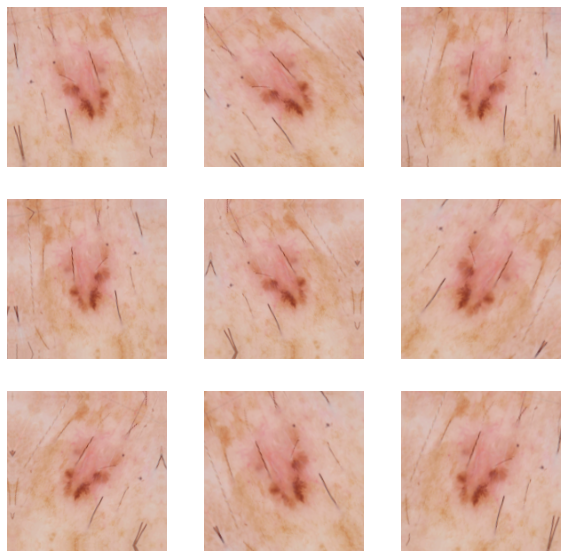

In [ ]:
# Visualizing how the augmentation strategy works for one instance of training image.

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

#### **Task 6: Create, compile and train the model**

Model Definition

In [ ]:
## Your code goes here
## You should also include dropouts to tackle with overfitting. (compulsory)
## We are including dropout of 0.25 after each Maxpooling

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Compiling the model including dropouts

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Summarize the model

In [ ]:
## Your code goes here
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)       

Training the model

In [ ]:
# Note: Train your model for 25 epochs
## Your code goes here

epochs = 25
history_with_dropouts = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
56/56 [==============================] - 4s 55ms/step - loss: 2.4804 - accuracy: 0.2009 - val_loss: 2.1267 - val_accuracy: 0.2058
Epoch 2/25
56/56 [==============================] - 3s 50ms/step - loss: 2.0214 - accuracy: 0.2232 - val_loss: 2.0279 - val_accuracy: 0.2550
Epoch 3/25
56/56 [==============================] - 3s 50ms/step - loss: 1.8626 - accuracy: 0.3326 - val_loss: 1.7853 - val_accuracy: 0.4139
Epoch 4/25
56/56 [==============================] - 3s 51ms/step - loss: 1.6461 - accuracy: 0.4118 - val_loss: 1.6502 - val_accuracy: 0.4273
Epoch 5/25
56/56 [==============================] - 3s 50ms/step - loss: 1.5887 - accuracy: 0.4420 - val_loss: 1.6763 - val_accuracy: 0.4139
Epoch 6/25
56/56 [==============================] - 3s 50ms/step - loss: 1.5837 - accuracy: 0.4408 - val_loss: 1.5794 - val_accuracy: 0.4430
Epoch 7/25
56/56 [==============================] - 3s 50ms/step - loss: 1.5308 - accuracy: 0.4660 - val_loss: 1.4731 - val_accuracy: 0.4922
Epoch 8/25
56

#### Visualizing the results

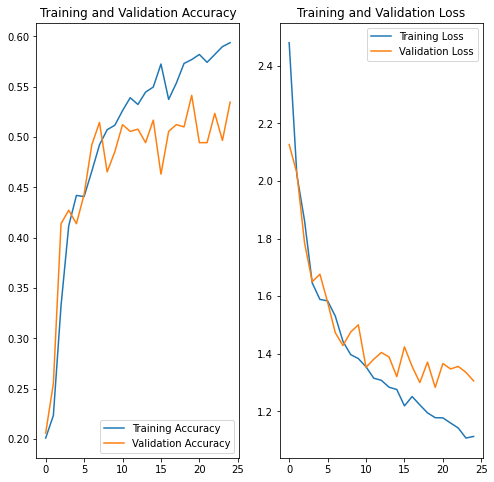

In [ ]:
# Graphs
acc = history_with_dropouts.history['accuracy']
val_acc = history_with_dropouts.history['val_accuracy']

loss = history_with_dropouts.history['loss']
val_loss = history_with_dropouts.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Question 3**:
Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Answer**:

Here, we can now see that traning and validation accuracy are going hand in hand i.e both ranges between difference of 3 to 8 %

Hence, we can now conclude that model is not overfitting nor underfitting. But we can see that accuracy has reduced more than 25%  than previous model.

## Distribution in the dataset

**Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<br>

#### **Task 7: Find the distribution of classes in the training dataset.**

In [ ]:
## Your code goes here.
labels = np.array([x[1].numpy() for x in list(train_ds)])
labels=labels.flatten().tolist()
for i in range(num_classes) :
  print(class_names[i],"has count",labels.count(i))

actinic keratosis has count 92
basal cell carcinoma has count 309
dermatofibroma has count 77
melanoma has count 352
nevus has count 277
pigmented benign keratosis has count 370
seborrheic keratosis has count 58
squamous cell carcinoma has count 142
vascular lesion has count 115


#### **Question 4:**  
 - Which class has the least number of samples?
 - Which classes dominate the data in terms proportionate number of samples?


#### **Answer:**

Checking above for training data set, we can see that seborrheic keratosis has count 58 which has least number of samples, while pigmented benign keratosis has count 370 which dominates the data samples.



#### **Task 8: Rectifying the class imbalance**
You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
# Provide the path for the training dataset
path_to_training_dataset="/content/gdrive/MyDrive/ISIC/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)
    ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/ISIC/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F331D277090>: 100%|██████████| 500/500 [00:22<00:00, 21.98 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/ISIC/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3397EDD150>: 100%|██████████| 500/500 [00:23<00:00, 21.32 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/ISIC/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F331D195AD0>: 100%|██████████| 500/500 [00:24<00:00, 20.71 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/ISIC/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F331D173FD0>: 100%|██████████| 500/500 [01:46<00:00,  4.70 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/ISIC/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=962x676 at 0x7F331F42D550>: 100%|██████████| 500/500 [01:48<00:00,  4.59 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/ISIC/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F331F37F3D0>: 100%|██████████| 500/500 [00:23<00:00, 21.61 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/ISIC/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F331F37F450>: 100%|██████████| 500/500 [00:52<00:00,  9.56 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/ISIC/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F331FA6DC50>: 100%|██████████| 500/500 [00:23<00:00, 21.40 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/ISIC/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F331F42C710>: 100%|██████████| 500/500 [00:24<00:00, 20.01 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types. Lets take a look at total count of augmented images.

In [ ]:
# Count of images under each class after addition
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/ISIC/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030408.jpg_4bbf8872-5e98-4a98-b652-ee51fbd3b0b0.jpg',
 '/content/gdrive/MyDrive/ISIC/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028558.jpg_2c3df57d-5e1c-4658-bbde-ca2750088696.jpg',
 '/content/gdrive/MyDrive/ISIC/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026702.jpg_9d1e9435-1229-48a4-acd0-844ae16f3a2a.jpg',
 '/content/gdrive/MyDrive/ISIC/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026171.jpg_1756e345-de26-413a-b686-95675a979b2f.jpg',
 '/content/gdrive/MyDrive/ISIC/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033866.jpg_cd14e619-229f-40e4-83ad-faa03c3415b8.jpg',
 '/content/gdrive/MyDrive/ISIC/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028558.jpg_f4561629-c447-45b2-9ee3-165e30e65244.jpg',
 '/content/gdrive/MyDrive/ISIC/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029025.jpg_

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)

In [ ]:
df2['Label'].value_counts()

pigmented benign keratosis    500
seborrheic keratosis          500
melanoma                      500
dermatofibroma                500
actinic keratosis             500
basal cell carcinoma          500
vascular lesion               500
nevus                         500
squamous cell carcinoma       500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### **Task 9: Repeating the steps for balanced augmented data**

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

**Create a training dataset**

In [ ]:
# Provide the path here
data_dir_train=pathlib.Path("/content/gdrive/MyDrive/ISIC/Train/")

# Provide the subset value here
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


**Create a validation dataset**

In [ ]:
# Provide the subset value here
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


**Create your model (make sure to include normalization)**

In [ ]:
## Your code goes here
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

**Compile your model (Choose optimizer and loss function appropriately)**

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Train your model**

In [ ]:
# Note: Train your model for 30 epochs
## Your code goes here

history_final = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30
)

Epoch 1/30
169/169 [==============================] - 41s 227ms/step - loss: 2.2819 - accuracy: 0.1723 - val_loss: 2.0115 - val_accuracy: 0.1982
Epoch 2/30
169/169 [==============================] - 39s 223ms/step - loss: 1.7674 - accuracy: 0.3255 - val_loss: 1.8597 - val_accuracy: 0.2880
Epoch 3/30
169/169 [==============================] - 39s 226ms/step - loss: 1.5511 - accuracy: 0.4062 - val_loss: 1.9090 - val_accuracy: 0.2843
Epoch 4/30
169/169 [==============================] - 38s 216ms/step - loss: 1.4228 - accuracy: 0.4714 - val_loss: 1.6978 - val_accuracy: 0.3601
Epoch 5/30
169/169 [==============================] - 39s 224ms/step - loss: 1.3614 - accuracy: 0.4891 - val_loss: 1.5641 - val_accuracy: 0.4209
Epoch 6/30
169/169 [==============================] - 39s 223ms/step - loss: 1.3068 - accuracy: 0.5074 - val_loss: 1.4176 - val_accuracy: 0.4543
Epoch 7/30
169/169 [==============================] - 38s 221ms/step - loss: 1.2713 - accuracy: 0.5191 - val_loss: 1.4944 - val_ac

**Visualize the model results**

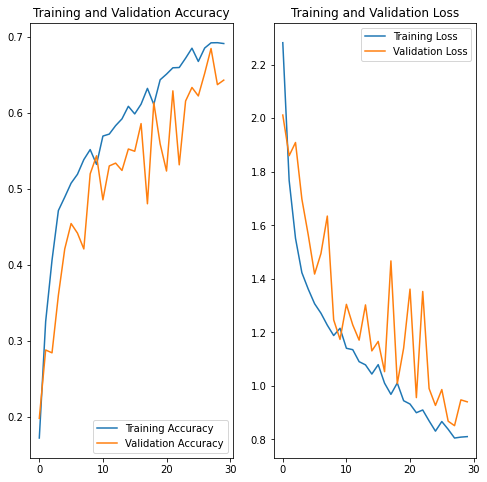

In [ ]:
# Graphs
acc = history_final.history['accuracy']
val_acc = history_final.history['val_accuracy']

loss = history_final.history['loss']
val_loss = history_final.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Task 10: Analyzing the results** 


#### **Question:**
- Did you get rid of underfitting/overfitting from the model? 
- Did class rebalance help in the process?


#### **Answer :**

Above graph suggests accuracy for Validation increasing along with Training and this suggest that we have got rid of overfitting in the model to a major extend.

Yes, after rebalancing of classes, the model is well trained and so, accuracy has improved as well.